In [1]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

In [29]:
# read contents of a csv file from GitHub into a Pandas DataFrame
dm = pd.read_csv('https://raw.githubusercontent.com/chenwen1226/DAV-5400/master/diamonds.csv')
dm.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### 1. What proportion of diamonds are between .30 and 1.08 carats?

Get the number of diamonds between .30 and 1.08 carats.

In [3]:
dm['carat'][(dm['carat']>=0.3) & (dm['carat']<=1.08)].count()

40284

Get the total number of diamonds in the pool.

In [44]:
dm.shape[0]

53940

Calculate the proportion meeting the requirement.

In [45]:
dm['carat'][(dm['carat']>=0.3) & (dm['carat']<=1.08)].count() / dm.shape[0]

0.7468298109010011

#### So the number of diamonds between .30 and 1.08 carats is 0.746.

#### 2. How many of the diamonds have equal x and y dimensions?

In [6]:
dm[dm['x'] == dm['y']].count()

carat      17
cut        17
color      17
clarity    17
depth      17
table      17
price      17
x          17
y          17
z          17
dtype: int64

#### There are 17 diamonds having equal x and y dimensions.

#### 3. How many of the diamonds have a carat less than the mean carat value?

First, calculate the mean carat value.

In [8]:
dm['carat'].mean()

0.7979397478679852

Then, find the diamonds whose carat is less than the mean carat value.

In [10]:
dm['carat'][dm['carat'] < dm['carat'].mean()].count()

31127

#### So 31127 diamonds have a carat less than the mean carat valaue.

#### 4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

In [13]:
dm[(dm['cut'] == 'Premium') | (dm['cut'] == 'Ideal')].count()

carat      35342
cut        35342
color      35342
clarity    35342
depth      35342
table      35342
price      35342
x          35342
y          35342
z          35342
dtype: int64

#### 35342 diamonds have a Premium cut or better.

#### 5. Which diamond has the highest price per carat? What is its value?

Create a new column that represents price/carat.

In [46]:
dm['price/carat'] = dm['price']/dm['carat']
dm['price/carat'].head()

0    1417.391304
1    1552.380952
2    1421.739130
3    1151.724138
4    1080.645161
Name: price/carat, dtype: float64

First, find the maximum value of price/carat.

In [63]:
dm['price/carat'].max()

17828.846153846152

Then, find the index of the maximum value.

In [61]:
dm[dm['price/carat'] == max(dm['price/carat'])].index[0]

27635

#### No.27635 diamond has the highest price per carat. And its value is 17828.8.

#### 6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

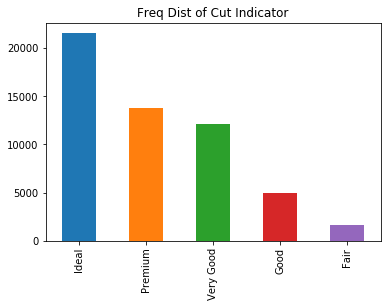

In [66]:
bplt1 = dm['cut'].value_counts().plot.bar(title = "Freq Dist of Cut Indicator")
bplt1;

#### Among five cut values, 'Ideal' comes with the highest numbers which is more than 20,000; 'Premium' and 'Very Good' follows with a number between 10,000 and 15,000; 'Good' has around 5,000 records and 'Fair' has the lest number less than 3,000.

#### 7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.

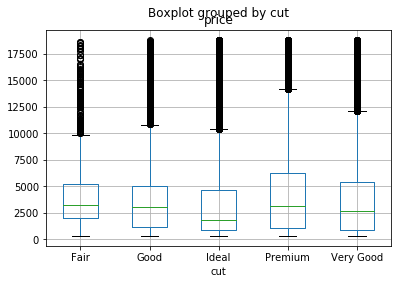

In [69]:
dm.boxplot(by = 'cut',column = ['price'])

#### *In all five cut value groups, there are too many outliers on the upper side; but no outliers on the lower side.*
#### *The whiskers of bottom 25% are almost the same, but the whiskers of top 25% vary hugely.*

#### 8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

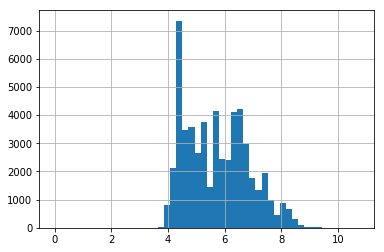

In [92]:
dm.x.hist(bins=50)

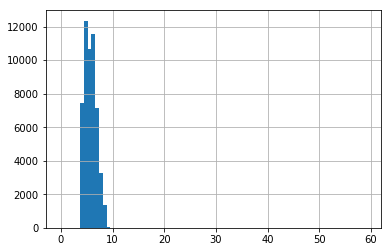

In [90]:
dm.y.hist(bins=80)

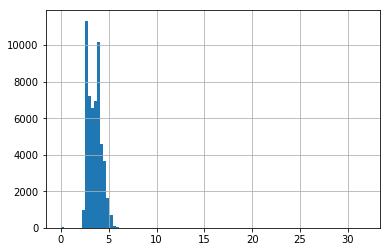

In [86]:
dm.z.hist(bins=100)

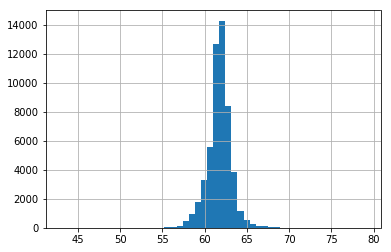

In [87]:
dm.depth.hist(bins=50)

* Only total depth distribution graph is roughly symmetric, other graphs are not symmetric at all;
* There is a unimodal in total depth distribution graph, while there are two peaks in wideth and depth distribution graphs;
* Width and depth distribution graphs are obviously skewed right.

#### 9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

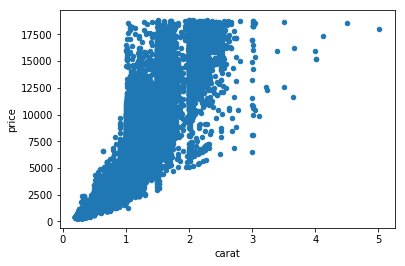

In [88]:
dm.plot.scatter('carat','price')

#### There is a strong, positive, nonlinear association with a few outliers.